In [141]:
#! glpsol -m ./model_psm_revised_testflight.gmpl -d ./Scenario_X_data_psm_testflight.gmpl
#! glpsol -m ./model_psm_revised_testflight_interval_11.gmpl -d ./Scenario_X_data_psm_testflight_interval_11.gmpl
# glpsol -m ./model_psm_revised_testflight_interval_2.gmpl -d ./Scenario_X_data_psm_testflight_interval_2.gmpl 

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FuncFormatter

# Set the style
#sns.set_palette('pastel')
specical_color = 'tab20'
Accent = 'Accent'
Set1 = 'Set1'
Pastel1 = 'Pastel1'
Paired = 'Paired'
sns.set_palette(specical_color)

In [143]:
file_path = '../out/'

Scenario_A_data_file_path = file_path + 'ScenarioA/ScenarioA_itr_2'
Scenario_B_data_file_path = file_path + 'ScenarioB/ScenarioB_itr_2'
Scenario_C_data_file_path = file_path + 'ScenarioC/ScenarioC_itr_1'

Scenario_A_name = 'Scenario A: BD-BDG'
Scenario_B_name = 'Scenario B: HD-BDG'
Scenario_C_name = 'Scenario C: HD-HDG'

# Energy Supply Transformation

In [144]:
def get_energy_supply_capacity(BAU_data_path):
    full_path_capacity = BAU_data_path + '/TotalCapacityAnnual.csv'
    total_annual_capacity = pd.read_csv(full_path_capacity, index_col=None, header=0)
    total_annual_capacity = total_annual_capacity[total_annual_capacity['t'].str.startswith('PWR')]
    # sub string the first 6 characters of the string in column 't'
    total_annual_capacity['t'] = total_annual_capacity['t'].str[0:6]
    total_annual_capacity = total_annual_capacity.groupby(['t','y']).agg({'TotalCapacityAnnual': 'sum'}).reset_index()

    total_annual_capacity_pivoted = total_annual_capacity.pivot(index='y', columns='t', values='TotalCapacityAnnual')

    all_technologies = ['PWRBIO', 'PWRGEO', 'PWRHFO', 'PWRHYD', 'PWRLFO', 'PWRNGS', 'PWRPHS', 'PWRSOL', 'PWRURN', 'PWRWND']
    total_annual_capacity_pivoted = total_annual_capacity_pivoted.reindex(columns=all_technologies, fill_value=0)
    
    return total_annual_capacity_pivoted

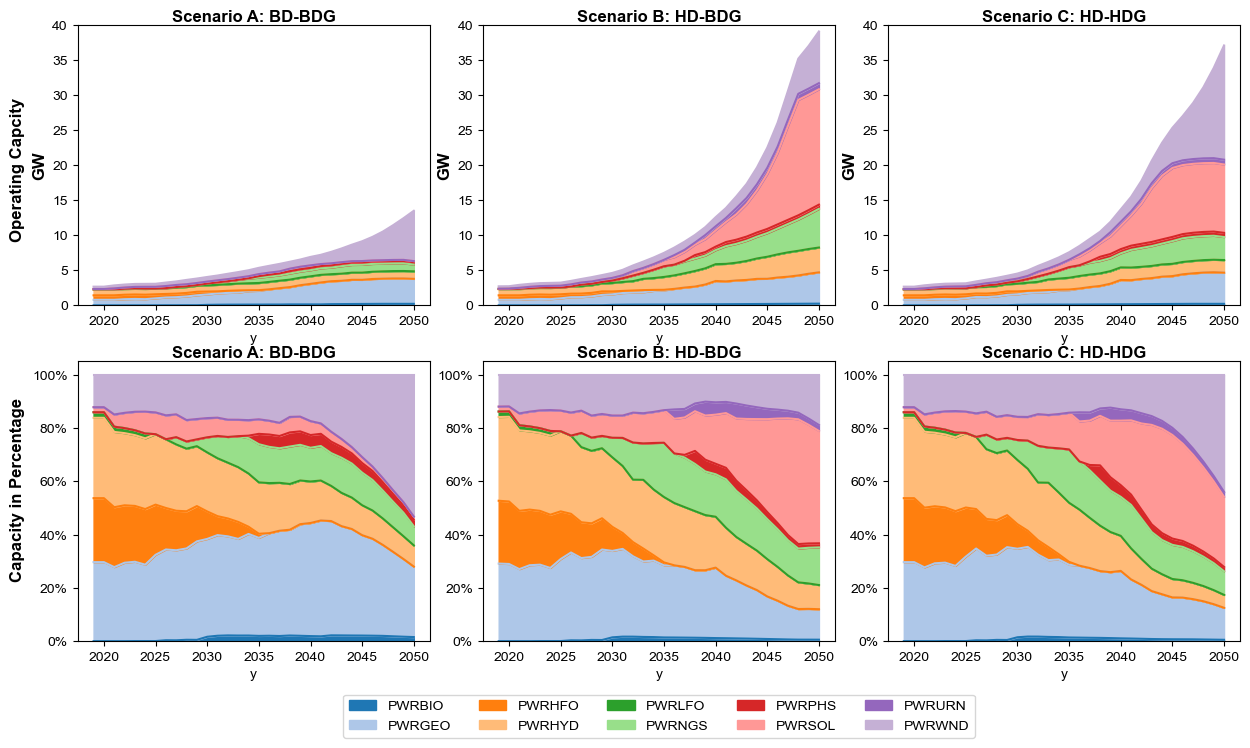

In [145]:
plt.rcParams.update({'font.family': 'Arial'})
fig = plt.figure(figsize=(15,8))  # You can adjust the size to fit your requirements
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 1], wspace=0.15)
axes = [plt.subplot(gs[i, j]) for i in range(2) for j in range(3)]

# Add the column titles above the plot
fig.text(0.085, 0.7, 'Operating Capcity',     rotation='vertical',      verticalalignment='center', fontsize=12, horizontalalignment='center',fontweight='bold')
fig.text(0.085, 0.3, 'Capacity in Percentage',   rotation='vertical',       verticalalignment='center', fontsize=12, horizontalalignment='center',fontweight='bold')

# Add the row titles to the left side of the plot
axes[0].set_title(Scenario_A_name, verticalalignment='center', fontsize=12,fontweight='bold')
axes[1].set_title(Scenario_B_name, verticalalignment='center', fontsize=12,fontweight='bold')
axes[2].set_title(Scenario_C_name, verticalalignment='center', fontsize=12,fontweight='bold')


Scenario_A_capacity = get_energy_supply_capacity(Scenario_A_data_file_path)
Scenario_B_capacity = get_energy_supply_capacity(Scenario_B_data_file_path)
Scenario_C_capacity = get_energy_supply_capacity(Scenario_C_data_file_path)


# Calculate the maximum y-value across all three DataFrames
max_y = 40

# Create the plots with the same y-axis
Scenario_A_capacity.plot(kind='area', ax=axes[0], legend=False)
axes[0].set_ylim([0, max_y])

Scenario_B_capacity.plot(kind='area', ax=axes[1], legend=False)
axes[1].set_ylim([0, max_y])

Scenario_C_capacity.plot(kind='area', ax=axes[2], legend=False)
axes[2].set_ylim([0, max_y])

# add unit to y-axis
axes[0].set_ylabel('GW', fontsize=12, fontweight='bold')
axes[1].set_ylabel('GW', fontsize=12, fontweight='bold')
axes[2].set_ylabel('GW', fontsize=12, fontweight='bold')


# Add the row titles to the left side of the plot
axes[3].set_title(Scenario_A_name, verticalalignment='center', fontsize=12,fontweight='bold')
axes[4].set_title(Scenario_B_name, verticalalignment='center', fontsize=12,fontweight='bold')
axes[5].set_title(Scenario_C_name, verticalalignment='center', fontsize=12,fontweight='bold')

Scenario_A_capacity_percentage = Scenario_A_capacity.div(Scenario_A_capacity.sum(axis=1), axis=0)
Scenario_B_capacity_percentage = Scenario_B_capacity.div(Scenario_B_capacity.sum(axis=1), axis=0)
Scenario_C_capacity_percentage = Scenario_C_capacity.div(Scenario_C_capacity.sum(axis=1), axis=0)

# Define a function to format the y-axis labels as percentages
def to_percent(y, position):
    return f'{100 * y:.0f}%'

# Create a formatter using this function
formatter = FuncFormatter(to_percent)

# Apply the formatter to the y-axis of each plot
axes[3].yaxis.set_major_formatter(formatter)
axes[4].yaxis.set_major_formatter(formatter)
axes[5].yaxis.set_major_formatter(formatter)


Scenario_A_capacity_percentage.plot(kind='area', ax=axes[3], legend=False)
Scenario_B_capacity_percentage.plot(kind='area', ax=axes[4], legend=False)
Scenario_C_capacity_percentage.plot(kind='area', ax=axes[5], legend=False)

# Add legend
axes[4].legend(loc='lower center', bbox_to_anchor=(0.5, -0.37), ncol=5)

# System Transition Cost

In [146]:
def get_energy_supply_cost_operating(BAU_data_path):
    full_path_variable_operating_cost = BAU_data_path + '/AnnualVariableOperatingCost.csv'
    total_variable_operating_cost = pd.read_csv(full_path_variable_operating_cost, index_col=None, header=0)
    total_variable_operating_cost = total_variable_operating_cost[total_variable_operating_cost['t'].str.startswith('PWR')]
    # sub string the first 6 characters of the string in column 't'
    total_variable_operating_cost['t'] = total_variable_operating_cost['t'].str[0:6]
    total_variable_operating_cost = total_variable_operating_cost.groupby(['t','y']).agg({'AnnualVariableOperatingCost': 'sum'}).reset_index()
    total_variable_operating_cost_pivot = total_variable_operating_cost.pivot(index='y', columns='t', values='AnnualVariableOperatingCost')

    full_path_fixed_operating_cost = BAU_data_path + '/AnnualFixedOperatingCost.csv'
    total_fixed_operating_cost = pd.read_csv(full_path_fixed_operating_cost, index_col=None, header=0)
    total_fixed_operating_cost = total_fixed_operating_cost[total_fixed_operating_cost['t'].str.startswith('PWR')]
    # sub string the first 6 characters of the string in column 't'
    total_fixed_operating_cost['t'] = total_fixed_operating_cost['t'].str[0:6]
    total_fixed_operating_cost = total_fixed_operating_cost.groupby(['t','y']).agg({'AnnualFixedOperatingCost': 'sum'}).reset_index()
    total_fixed_operating_cost_pivot = total_fixed_operating_cost.pivot(index='y', columns='t', values='AnnualFixedOperatingCost')

    total_operating_cost = total_variable_operating_cost_pivot + total_fixed_operating_cost_pivot /100

    all_technologies = ['PWRBIO', 'PWRGEO', 'PWRHFO', 'PWRHYD', 'PWRLFO', 'PWRNGS', 'PWRPHS', 'PWRSOL', 'PWRURN', 'PWRWND']
    total_operating_cost_pivoted = total_operating_cost.reindex(columns=all_technologies, fill_value=0)

    return total_operating_cost_pivoted



def get_energy_supply_cost_invest(BAU_data_path):
    full_path_capacity = BAU_data_path + '/CapitalInvestment.csv'
    total_investing_cost_raw = pd.read_csv(full_path_capacity, index_col=None, header=0)
    total_investing_cost_raw = total_investing_cost_raw[total_investing_cost_raw['t'].str.startswith('PWR')]
    # sub string the first 6 characters of the string in column 't'
    total_investing_cost_raw['t'] = total_investing_cost_raw['t'].str[0:6]
    total_investing_cost_raw = total_investing_cost_raw.groupby(['t','y']).agg({'CapitalInvestment': 'sum'}).reset_index()

    total_investing_cost = total_investing_cost_raw.pivot(index='y', columns='t', values='CapitalInvestment')/100

    all_technologies = ['PWRBIO', 'PWRGEO', 'PWRHFO', 'PWRHYD', 'PWRLFO', 'PWRNGS', 'PWRPHS', 'PWRSOL', 'PWRURN', 'PWRWND']
    total_investing_cost_pivoted = total_investing_cost.reindex(columns=all_technologies, fill_value=0)
    
    return total_investing_cost_pivoted


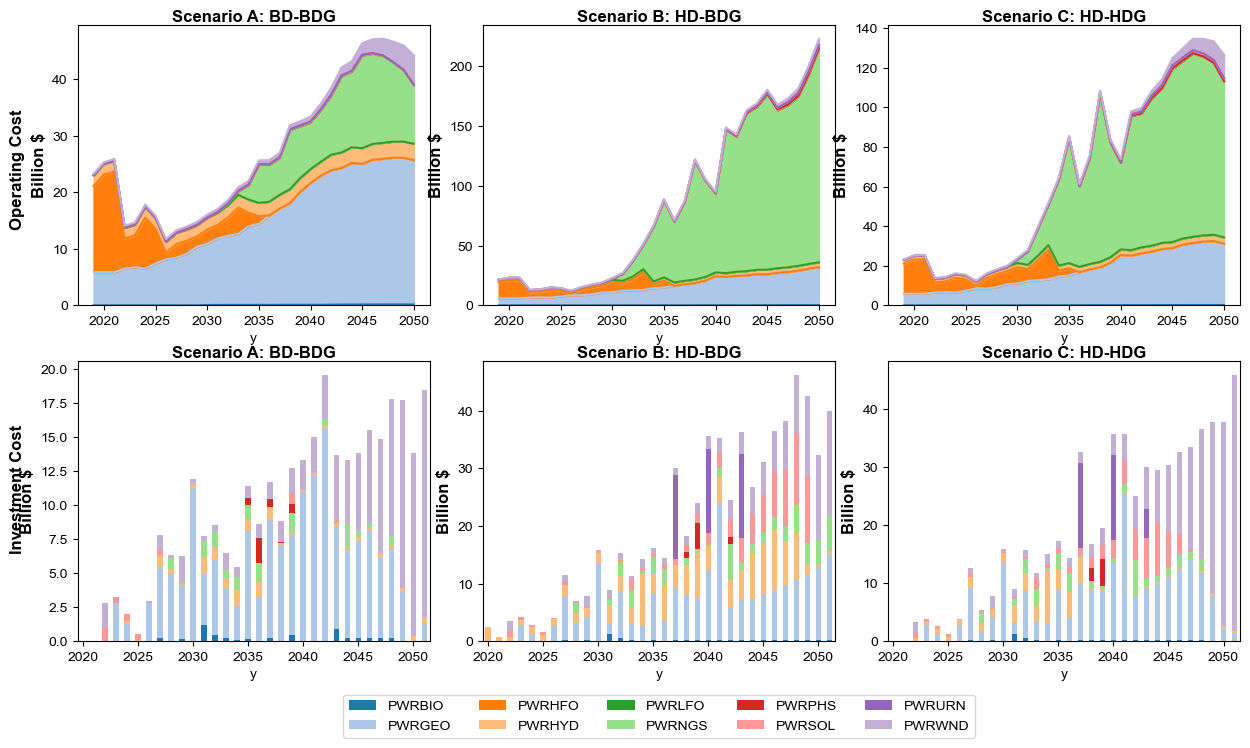

In [147]:
plt.rcParams.update({'font.family': 'Arial'})
fig = plt.figure(figsize=(15,8))  # You can adjust the size to fit your requirements
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 1], wspace=0.15)
axes = [plt.subplot(gs[i, j]) for i in range(2) for j in range(3)]

# Add the column titles above the plot
fig.text(0.085, 0.7, 'Operating Cost',     rotation='vertical',      verticalalignment='center', fontsize=12, horizontalalignment='center',fontweight='bold')
fig.text(0.085, 0.3, 'Investment Cost',   rotation='vertical',       verticalalignment='center', fontsize=12, horizontalalignment='center',fontweight='bold')


# Add the row titles to the left side of the plot
axes[0].set_title(Scenario_A_name, verticalalignment='center', fontsize=12,fontweight='bold')
axes[3].set_title(Scenario_A_name, verticalalignment='center', fontsize=12,fontweight='bold')
axes[1].set_title(Scenario_B_name, verticalalignment='center', fontsize=12,fontweight='bold')
axes[4].set_title(Scenario_B_name, verticalalignment='center', fontsize=12,fontweight='bold')
axes[2].set_title(Scenario_C_name, verticalalignment='center', fontsize=12,fontweight='bold')
axes[5].set_title(Scenario_C_name, verticalalignment='center', fontsize=12,fontweight='bold')


get_energy_supply_cost_operating(Scenario_A_data_file_path).plot(kind='area',  legend=False, ax=axes[0])
get_energy_supply_cost_operating(Scenario_B_data_file_path).plot(kind='area',  legend=False, ax=axes[1])
get_energy_supply_cost_operating(Scenario_C_data_file_path).plot(kind='area',  legend=False, ax=axes[2])

get_energy_supply_cost_invest(Scenario_A_data_file_path).plot(kind='bar',  stacked = True,legend=False, ax=axes[3])
axes[3].set_xticks([0, 5, 10, 15, 20, 25, 30])
axes[3].set_xticklabels([2020, 2025, 2030, 2035, 2040, 2045, 2050], rotation=0)
get_energy_supply_cost_invest(Scenario_B_data_file_path).plot(kind='bar',  stacked = True,legend=False, ax=axes[4])
axes[4].set_xticks([0, 5, 10, 15, 20, 25, 30])
axes[4].set_xticklabels([2020, 2025, 2030, 2035, 2040, 2045, 2050], rotation=0)
get_energy_supply_cost_invest(Scenario_C_data_file_path).plot(kind='bar',  stacked = True,legend=False, ax=axes[5])
axes[5].set_xticks([0, 5, 10, 15, 20, 25, 30])
axes[5].set_xticklabels([2020, 2025, 2030, 2035, 2040, 2045, 2050], rotation=0)


# max_y_cost_operating = 40
# max_y_cost_invest = 40

# axes[0].set_ylim([0, max_y_cost_operating])
# #axes[1].set_ylim([0, max_y_cost_operating])
# #axes[2].set_ylim([0, max_y_cost_operating])
# axes[3].set_ylim([0, max_y_cost_invest])
# axes[4].set_ylim([0, max_y_cost_invest])
# axes[5].set_ylim([0, max_y_cost_invest])

# add unit to y-axis
axes[0].set_ylabel('Billion $', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Billion $', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Billion $', fontsize=12, fontweight='bold')
axes[3].set_ylabel('Billion $', fontsize=12, fontweight='bold')
axes[4].set_ylabel('Billion $', fontsize=12, fontweight='bold')
axes[5].set_ylabel('Billion $', fontsize=12, fontweight='bold')

# Add legend
axes[4].legend(loc='lower center', bbox_to_anchor=(0.5, -0.37), ncol=5)

In [148]:
def get_energy_supply_capacity_101(data_file_path):
    full_path_capacity = data_file_path + '/TotalCapacityAnnual.csv'
    total_annual_capacity = pd.read_csv(full_path_capacity, index_col=None, header=0)
    total_annual_capacity = total_annual_capacity[total_annual_capacity['t'].str.endswith('101')]

    total_annual_capacity = total_annual_capacity.groupby(['t', 'y']).agg({'TotalCapacityAnnual': 'sum'}).reset_index()
    total_annual_capacity_pivoted = total_annual_capacity.pivot(index='y', columns='t', values='TotalCapacityAnnual')
    total_annual_capacity_pivoted = total_annual_capacity_pivoted[total_annual_capacity_pivoted.index >= 2025]

    all_technologies = ['PWRGEO101','PWRHYD101','PWRSOL101','PWRWND101']
    total_annual_capacity_pivoted = total_annual_capacity_pivoted.reindex(columns=all_technologies, fill_value=0)

    return total_annual_capacity_pivoted


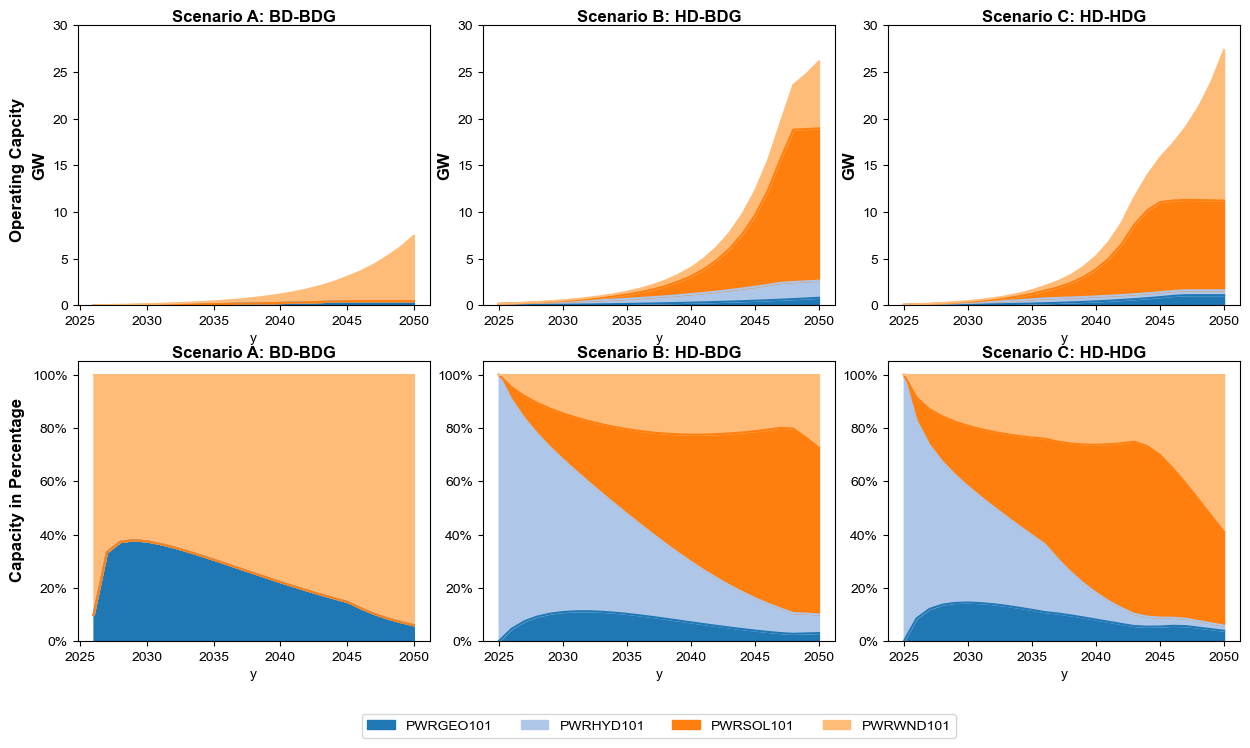

In [149]:
plt.rcParams.update({'font.family': 'Arial'})
fig = plt.figure(figsize=(15,8))  # You can adjust the size to fit your requirements
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 1], wspace=0.15)
axes = [plt.subplot(gs[i, j]) for i in range(2) for j in range(3)]

# Add the column titles above the plot
fig.text(0.085, 0.7, 'Operating Capcity',     rotation='vertical',      verticalalignment='center', fontsize=12, horizontalalignment='center',fontweight='bold')
fig.text(0.085, 0.3, 'Capacity in Percentage',   rotation='vertical',       verticalalignment='center', fontsize=12, horizontalalignment='center',fontweight='bold')

# Add the row titles to the left side of the plot
axes[0].set_title(Scenario_A_name, verticalalignment='center', fontsize=12,fontweight='bold')
axes[1].set_title(Scenario_B_name, verticalalignment='center', fontsize=12,fontweight='bold')
axes[2].set_title(Scenario_C_name, verticalalignment='center', fontsize=12,fontweight='bold')


Scenario_A_capacity_101 = get_energy_supply_capacity_101(Scenario_A_data_file_path)
Scenario_B_capacity_101 = get_energy_supply_capacity_101(Scenario_B_data_file_path)
Scenario_C_capacity_101 = get_energy_supply_capacity_101(Scenario_C_data_file_path)


# Calculate the maximum y-value across all three DataFrames
max_y = 30

# Create the plots with the same y-axis
Scenario_A_capacity_101.plot(kind='area', ax=axes[0], legend=False)
axes[0].set_ylim([0, max_y])

Scenario_B_capacity_101.plot(kind='area', ax=axes[1], legend=False)
axes[1].set_ylim([0, max_y])

Scenario_C_capacity_101.plot(kind='area', ax=axes[2], legend=False)
axes[2].set_ylim([0, max_y])

# add unit to y-axis
axes[0].set_ylabel('GW', fontsize=12, fontweight='bold')
axes[1].set_ylabel('GW', fontsize=12, fontweight='bold')
axes[2].set_ylabel('GW', fontsize=12, fontweight='bold')


# Add the row titles to the left side of the plot
axes[3].set_title(Scenario_A_name, verticalalignment='center', fontsize=12,fontweight='bold')
axes[4].set_title(Scenario_B_name, verticalalignment='center', fontsize=12,fontweight='bold')
axes[5].set_title(Scenario_C_name, verticalalignment='center', fontsize=12,fontweight='bold')

Scenario_A_capacity_percentage_101 = Scenario_A_capacity_101.div(Scenario_A_capacity_101.sum(axis=1), axis=0)
Scenario_B_capacity_percentage_101 = Scenario_B_capacity_101.div(Scenario_B_capacity_101.sum(axis=1), axis=0)
Scenario_C_capacity_percentage_101 = Scenario_C_capacity_101.div(Scenario_C_capacity_101.sum(axis=1), axis=0)

# Define a function to format the y-axis labels as percentages
def to_percent(y, position):
    return f'{100 * y:.0f}%'

# Create a formatter using this function
formatter = FuncFormatter(to_percent)

# Apply the formatter to the y-axis of each plot
axes[3].yaxis.set_major_formatter(formatter)
axes[4].yaxis.set_major_formatter(formatter)
axes[5].yaxis.set_major_formatter(formatter)


Scenario_A_capacity_percentage_101.plot(kind='area', ax=axes[3], legend=False)
Scenario_B_capacity_percentage_101.plot(kind='area', ax=axes[4], legend=False)
Scenario_C_capacity_percentage_101.plot(kind='area', ax=axes[5], legend=False)

# Add legend
axes[4].legend(loc='lower center', bbox_to_anchor=(0.5, -0.37), ncol=5)